# 바이오차 메타 데이터: 기초 통계

## 최종 목표

- 바이오차의 밭 토양 온실가스 배출 저감, 토양 탄소 증진, 토양 환경 개선 효과를 정량적으로 평가
- 바이오차 활용 및 보급을 위한 사업화 근거 마련

## 세부 목표

- 밭에서 바이오차 활용시 아산화질소 배출 저감·탄소증진·토양환경 개선 효과 메타 분석 
- 밭에서 바이오차 효과 극대화를 위한 바이오차 및 영농 조건 제시
- 밭에서 유래된 바이오차를 활용한 온실가스 저감 및 토양환경 개선 효과 실증 
- 밭에서 바이오차 활용 사업화 모델 실증 자료 제공
- 밭에서 경축순환 바이오차 활용 사업화 모델 실증 자료 제공 

## 주요 처리 기법

- 범주형 특성 처리: `RR` 값에 따라 순차적으로 정수 인코딩 적용
    - **정수 인코딩 후 계속해서 범주형으로 간주**
- 데이터 분포 확인: `groupby()` 메서드 활용

## 필요한 모듈 임포트

In [1]:
# numpy와 pandas
import numpy as np
import pandas as pd

In [2]:
# 그래프 모듈
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 시간 데이터
from datetime import datetime

In [4]:
# 사이킷런 모델
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [5]:
# 머신러닝 모델 저장
import joblib

In [6]:
# 디렉토리 관리
from pathlib import Path

**matplotlib 한글 설정**

pip을 이용하여 `koreanize_matplotlib`을 먼저 운영체제에 설치해야 한다.

In [7]:
# !pip install koreanize_matplotlib
# import koreanize_matplotlib

**pyplot 그래프 설정**

In [8]:
# 그래프 설정
plt.rc('figure', figsize=(10, 6))  # 그래프 크기 지정

**데이터프레임 설정**

In [9]:
pd.set_option('display.max_columns', None) # 모든 특성이 잘리지 않도록 함.

## 데이터 불러오기

**데이터 저장소**

현재 디렉토리 안의 `data` 디렉토리에 데이터 엑셀 파일이 있다고 가정하고 진행한다.

In [10]:
base_path = Path().cwd() / "data"

**데이터 엑셀 파일 불러오기**

Field+Pot 데이터만 살펴본다.

In [11]:
data_file = "meta_analysis_V6.xlsx"

In [12]:
meta = pd.read_excel(base_path / data_file, 
                     # skiprows= [0, 1, 2, 3], 
                     header=[0, 1], 
                     sheet_name=-1)

### Field 데이터

In [13]:
meta

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
          First author   Publication year             number   
0                Yoo.G               2018                1.0   
1                  NaN                NaN                NaN   
2                  NaN                NaN                NaN   
3                  NaN                NaN                NaN   
4               Sun. Z               2017                2.0   
..                 ...                ...                ...   
398             Song.Y               2019               94.0   
399                NaN                NaN                NaN   
400                NaN                NaN                NaN   
401                NaN                NaN                NaN   
402                NaN                NaN                NaN   

           Unnamed: 3_level_0            Condition                       \
    Study region by continent Experimental_method       Fertilizer Type   
0                        Asia                Field  Chemical Fertilizer   
1                        Asia                Field  Chemical Fertilizer   
2                        Asia                Field  Chemical Fertilizer   
3                        Asia                Field  Chemical Fertilizer   
4                      Europe                Field        No Fertilizer   
..                        ...                  ...                  ...   
398                      Asia                Field  Chemical Fertilizer   
399                      Asia                Field  Chemical Fertilizer   
400                      Asia                Field  Chemical Fertilizer   
401                      Asia                Field  Chemical Fertilizer   
402                       NaN                  NaN                  NaN   

                                                                        \
    N_input kg N/ha Soil Texture    pH bulk density, g/cm3 Moisture, %   
0             140.0       coarse  7.20                 NaN         NaN   
1             190.0       coarse  6.90                 NaN         NaN   
2             225.0       coarse  5.90                 NaN         NaN   
3             225.0       coarse  5.90                 NaN         NaN   
4               0.0       coarse  6.81                 NaN         NaN   
..              ...          ...   ...                 ...         ...   
398           200.0       medium  4.48                1.14         NaN   
399           200.0       medium  4.48                1.14         NaN   
400           200.0       medium  4.48                1.14         NaN   
401           200.0       medium  4.48                1.14         NaN   
402             NaN          NaN   NaN                 NaN         NaN   

    Biochar                                                    \
         pH       C     C/N Tem. Range             Feed Stock   
0     10.30  0.4702   67.17    300-400  Lignocellulosic waste   
1     10.30  0.4702   67.17    300-400  Lignocellulosic waste   
2     10.30  0.4702   67.17    300-400  Lignocellulosic waste   
3     10.30  0.4702   67.17    300-400  Lignocellulosic waste   
4      9.35  0.7800  108.30       >800                   Wood   
..      ...     ...     ...        ...                    ...   
398    9.37  0.6670     NaN    500-600             Herbaceous   
399    9.37  0.6670     NaN    500-600             Herbaceous   
400    9.37  0.6670     NaN    500-600             Herbaceous   
401    9.37  0.6670     NaN    500-600             Herbaceous   
402     NaN     NaN     NaN        NaN                    NaN   

                                                                       \
    Application_Rate, t/ha X control X treatment     (unit)        RR   
0                      2.0  0.004100    0.007600  kg N ha−1  1.853659   
1                      2.0  0.002800    0.003200  kg N ha−1  1.142857   
2                      2.0  0.001100    0.001800  kg N ha−1  1.636364   
3                    

In [14]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 44 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   (Unnamed: 0_level_0, First author)               94 non-null     object 
 1   (Unnamed: 1_level_0, Publication year)           94 non-null     object 
 2   (Unnamed: 2_level_0, number)                     94 non-null     float64
 3   (Unnamed: 3_level_0, Study region by continent)  402 non-null    object 
 4   (Condition, Experimental_method )                402 non-null    object 
 5   (Condition, Fertilizer Type)                     402 non-null    object 
 6   (Condition, N_input kg N/ha)                     396 non-null    float64
 7   (Condition, Soil Texture)                        325 non-null    object 
 8   (Condition, pH)                                  364 non-null    float64
 9   (Condition, bulk density, g/cm3)

필요한 특성만 사용함.

In [15]:
field = meta.iloc[:-1, 3:22].copy()

field

Unnamed: 3_level_0            Condition                       \
    Study region by continent Experimental_method       Fertilizer Type   
0                        Asia                Field  Chemical Fertilizer   
1                        Asia                Field  Chemical Fertilizer   
2                        Asia                Field  Chemical Fertilizer   
3                        Asia                Field  Chemical Fertilizer   
4                      Europe                Field        No Fertilizer   
..                        ...                  ...                  ...   
397                      Asia                  Pot        No Fertilizer   
398                      Asia                Field  Chemical Fertilizer   
399                      Asia                Field  Chemical Fertilizer   
400                      Asia                Field  Chemical Fertilizer   
401                      Asia                Field  Chemical Fertilizer   

                                                                        \
    N_input kg N/ha Soil Texture    pH bulk density, g/cm3 Moisture, %   
0             140.0       coarse  7.20                 NaN         NaN   
1             190.0       coarse  6.90                 NaN         NaN   
2             225.0       coarse  5.90                 NaN         NaN   
3             225.0       coarse  5.90                 NaN         NaN   
4               0.0       coarse  6.81                 NaN         NaN   
..              ...          ...   ...                 ...         ...   
397             0.0       coarse  4.69                 NaN         NaN   
398           200.0       medium  4.48                1.14         NaN   
399           200.0       medium  4.48                1.14         NaN   
400           200.0       medium  4.48                1.14         NaN   
401           200.0       medium  4.48                1.14         NaN   

    Biochar                                                    \
         pH       C     C/N Tem. Range             Feed Stock   
0     10.30  0.4702   67.17    300-400  Lignocellulosic waste   
1     10.30  0.4702   67.17    300-400  Lignocellulosic waste   
2     10.30  0.4702   67.17    300-400  Lignocellulosic waste   
3     10.30  0.4702   67.17    300-400  Lignocellulosic waste   
4      9.35  0.7800  108.30       >800                   Wood   
..      ...     ...     ...        ...                    ...   
397    5.70  0.3305   39.80    400-500                   Wood   
398    9.37  0.6670     NaN    500-600             Herbaceous   
399    9.37  0.6670     NaN    500-600             Herbaceous   
400    9.37  0.6670     NaN    500-600             Herbaceous   
401    9.37  0.6670     NaN    500-600             Herbaceous   

                                                                       \
    Application_Rate, t/ha X control X treatment     (unit)        RR   
0                      2.0  0.004100    0.007600  kg N ha−1  1.853659   
1                      2.0  0.002800    0.003200  kg N ha−1  1.142857   
2                      2.0  0.001100    0.001800  kg N ha−1  1.636364   
3                      2.0  0.001100    0.000800  kg N ha−1  0.727273   
4                     10.0  0.000104    0.000163  kg N ha−1  1.561960   
..                     ...       ...         ...        ...       ...   
397                    0.8  0.000004    0.000004  kg N ha−1  0.906902   
398                    5.0  2.440000    1.710000  kg N ha−1  0.700820   
399                   15.0  2.440000    1.650000  kg N ha−1  0.676230   
400                    5.0  2.560000    2.060000  kg N ha−1  0.804688   
401                   15.0  2.560000    1.820000  kg N ha−1  0.710938   

                  
    N2O % Change  
0       0.853659  
1       0.142857  
2       0.636364  
3      -0.272727  
4       0.561960  
..           ...  
397    -0.093098  
398    -0.299180  
399    -0.323770  
400    -0.195312  
401    -0.289062  

[402 rows x 19 columns]

In [16]:
field.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 19 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   (Unnamed: 3_level_0, Study region by continent)  402 non-null    object 
 1   (Condition, Experimental_method )                402 non-null    object 
 2   (Condition, Fertilizer Type)                     402 non-null    object 
 3   (Condition, N_input kg N/ha)                     396 non-null    float64
 4   (Condition, Soil Texture)                        325 non-null    object 
 5   (Condition, pH)                                  364 non-null    float64
 6   (Condition, bulk density, g/cm3)                 207 non-null    float64
 7   (Condition, Moisture, %)                         162 non-null    float64
 8   (Biochar, pH)                                    375 non-null    float64
 9   (Biochar, C)                    

아래 세 특성 삭제

- `(Condition, Experimental method)`: pot 도 field로 간주.
- `(Biochar, (unit))`: 단위 필요 없음
- `('Biochar', 'X control')`, `('Biochar', 'X treatment')`, `('Biochar', 'N2O % Change')`: 삭제
    - 이유: `('Biochar', 'RR')`를 타깃으로 지정

In [17]:
to_drop = [('Condition', 'Experimental_method '), 
           ('Biochar', 'X control'), 
           ('Biochar', 'X treatment'), 
           ('Biochar', '(unit)'), 
           ('Biochar', 'N2O % Change')]

In [18]:
field = field.drop(to_drop, axis=1)

In [19]:
field

Unnamed: 3_level_0            Condition                  \
    Study region by continent      Fertilizer Type N_input kg N/ha   
0                        Asia  Chemical Fertilizer           140.0   
1                        Asia  Chemical Fertilizer           190.0   
2                        Asia  Chemical Fertilizer           225.0   
3                        Asia  Chemical Fertilizer           225.0   
4                      Europe        No Fertilizer             0.0   
..                        ...                  ...             ...   
397                      Asia        No Fertilizer             0.0   
398                      Asia  Chemical Fertilizer           200.0   
399                      Asia  Chemical Fertilizer           200.0   
400                      Asia  Chemical Fertilizer           200.0   
401                      Asia  Chemical Fertilizer           200.0   

                                                       Biochar          \
    Soil Texture    pH bulk density, g/cm3 Moisture, %      pH       C   
0         coarse  7.20                 NaN         NaN   10.30  0.4702   
1         coarse  6.90                 NaN         NaN   10.30  0.4702   
2         coarse  5.90                 NaN         NaN   10.30  0.4702   
3         coarse  5.90                 NaN         NaN   10.30  0.4702   
4         coarse  6.81                 NaN         NaN    9.35  0.7800   
..           ...   ...                 ...         ...     ...     ...   
397       coarse  4.69                 NaN         NaN    5.70  0.3305   
398       medium  4.48                1.14         NaN    9.37  0.6670   
399       medium  4.48                1.14         NaN    9.37  0.6670   
400       medium  4.48                1.14         NaN    9.37  0.6670   
401       medium  4.48                1.14         NaN    9.37  0.6670   

                                                                                
        C/N Tem. Range             Feed Stock Application_Rate, t/ha        RR  
0     67.17    300-400  Lignocellulosic waste                    2.0  1.853659  
1     67.17    300-400  Lignocellulosic waste                    2.0  1.142857  
2     67.17    300-400  Lignocellulosic waste                    2.0  1.636364  
3     67.17    300-400  Lignocellulosic waste                    2.0  0.727273  
4    108.30       >800                   Wood                   10.0  1.561960  
..      ...        ...                    ...                    ...       ...  
397   39.80    400-500                   Wood                    0.8  0.906902  
398     NaN    500-600             Herbaceous                    5.0  0.700820  
399     NaN    500-600             Herbaceous                   15.0  0.676230  
400     NaN    500-600             Herbaceous                    5.0  0.804688  
401     NaN    500-600             Herbaceous                   15.0  0.710938  

[402 rows x 14 columns]

### 데이터 특성 탐색

In [20]:
field.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   (Unnamed: 3_level_0, Study region by continent)  402 non-null    object 
 1   (Condition, Fertilizer Type)                     402 non-null    object 
 2   (Condition, N_input kg N/ha)                     396 non-null    float64
 3   (Condition, Soil Texture)                        325 non-null    object 
 4   (Condition, pH)                                  364 non-null    float64
 5   (Condition, bulk density, g/cm3)                 207 non-null    float64
 6   (Condition, Moisture, %)                         162 non-null    float64
 7   (Biochar, pH)                                    375 non-null    float64
 8   (Biochar, C)                                     371 non-null    float64
 9   (Biochar, C/N)                  

## 전처리

### 특성명 변경

- 0 레벨 컬럼 삭제

In [21]:
field = field.droplevel(axis=1, level=0)

- 기존 특성명 (1 레벨)

In [22]:
old_columns = list(field.columns)
old_columns

['Study region by continent',
 'Fertilizer Type',
 'N_input kg N/ha',
 'Soil Texture',
 'pH',
 'bulk density, g/cm3',
 'Moisture, %',
 'pH',
 'C',
 'C/N',
 'Tem. Range',
 'Feed Stock',
 'Application_Rate, t/ha',
 'RR']

- 새로운 특성명

In [23]:
new_columns = ['Region',
 'Fertilizer',
 'N_input',
 'Soil_Texture',
 'Cond_pH',
 'Bulk_density',
 'Moisture',
 'Bio_pH',
 'C',
 'C/N',
 'Temp',
 'Feedstock',
 'Application_Rate',
 'RR']

- 특성명 변경

In [24]:
field.columns = new_columns

In [25]:
field.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            402 non-null    object 
 1   Fertilizer        402 non-null    object 
 2   N_input           396 non-null    float64
 3   Soil_Texture      325 non-null    object 
 4   Cond_pH           364 non-null    float64
 5   Bulk_density      207 non-null    float64
 6   Moisture          162 non-null    float64
 7   Bio_pH            375 non-null    float64
 8   C                 371 non-null    float64
 9   C/N               359 non-null    float64
 10  Temp              363 non-null    object 
 11  Feedstock         390 non-null    object 
 12  Application_Rate  402 non-null    float64
 13  RR                402 non-null    float64
dtypes: float64(9), object(5)
memory usage: 44.1+ KB


### 결측치 처리

결측치 그대로 두고 진행함.

In [26]:
core_field = field.copy()
core_field.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            402 non-null    object 
 1   Fertilizer        402 non-null    object 
 2   N_input           396 non-null    float64
 3   Soil_Texture      325 non-null    object 
 4   Cond_pH           364 non-null    float64
 5   Bulk_density      207 non-null    float64
 6   Moisture          162 non-null    float64
 7   Bio_pH            375 non-null    float64
 8   C                 371 non-null    float64
 9   C/N               359 non-null    float64
 10  Temp              363 non-null    object 
 11  Feedstock         390 non-null    object 
 12  Application_Rate  402 non-null    float64
 13  RR                402 non-null    float64
dtypes: float64(9), object(5)
memory usage: 44.1+ KB


## 범주형 특성별 그룹화

In [27]:
cat_features = core_field.select_dtypes(include=['object']).columns
cat_features

Index(['Region', 'Fertilizer', 'Soil_Texture', 'Temp', 'Feedstock'], dtype='object')

In [28]:
base_features = ['RR']

**범주형 입력 특성들의 조합 결과 확인**

- 그룹별 평균값 계산 함수

In [29]:
def groupby_mean(input_features, df=core_field, base_features=base_features, by=[]):
    if len(input_features+by) == 1:
        return df[input_features+base_features].groupby(input_features+by, observed=True).mean()
    else:
        return df[input_features+base_features].groupby(input_features+by, observed=True).mean().unstack().stack(future_stack=True)

- 그룹별 샘플수 계산 함수

In [30]:
def groupby_count(input_features, df=core_field, base_features=base_features, by=[]):
    if len(input_features+by) == 1:
        return df[input_features+base_features].groupby(input_features+by, observed=True).count()
    else:
        return df[input_features+base_features].groupby(input_features+by, observed=True).count().unstack(fill_value=0).stack(future_stack=True)

- 그룹별 샘플수와 평균값 계산 함수

In [31]:
def groupby_count_mean(input_features, df=core_field, base_features=base_features, by=[]):
    gCount = groupby_count(input_features, df, base_features, by)
    gMean = groupby_mean(input_features, df, base_features, by)

    return pd.merge(gCount, gMean, left_index=True, right_index=True,  suffixes=("_count", "_mean"), how='outer')

In [32]:
f_Region = ['Asia', 'South America', 'Europe', 'North America', 'Australia']
f_Fertilizer = ['Organic Fertilizer', 'No Fertilizer', 'Chemical Fertilizer']
f_Soil_Texture = ['coarse', 'medium', 'fine']
f_Temp= ['300-400', '400-500', '500-600', '700-800', '600-700', '>800']
f_Feedstock = ['Biosolids', 'Wood', 'Herbaceous', 'Lignocellulosic waste', 'Manure']

In [33]:
feature_values = [f_Region, f_Fertilizer, f_Soil_Texture, f_Temp, f_Feedstock]

In [34]:
cat_features

Index(['Region', 'Fertilizer', 'Soil_Texture', 'Temp', 'Feedstock'], dtype='object')

**범주형 특성 4개 기준 평균값**

In [35]:
groupby_count_mean(['Fertilizer']).reindex(index=f_Fertilizer)

RR_count   RR_mean
Fertilizer                             
Organic Fertilizer         67  0.771395
No Fertilizer              26  0.976254
Chemical Fertilizer       309  0.826562

In [36]:
groupby_count_mean(['Soil_Texture']).reindex(index=f_Soil_Texture)

RR_count   RR_mean
Soil_Texture                    
coarse             111  0.792118
medium             182  0.796199
fine                32  0.943165

In [37]:
groupby_count_mean(['Temp']).reindex(index=f_Temp)

RR_count   RR_mean
Temp                       
300-400        31  0.830455
400-500       138  0.780954
500-600       121  0.790590
700-800         5  1.022879
600-700        48  0.789524
>800           20  0.833384

In [38]:
groupby_count_mean(['Feedstock']).reindex(index=f_Feedstock)

RR_count   RR_mean
Feedstock                                
Biosolids                    13  0.382772
Wood                         78  0.877727
Herbaceous                  215  0.810537
Lignocellulosic waste        67  0.958779
Manure                       17  0.742221

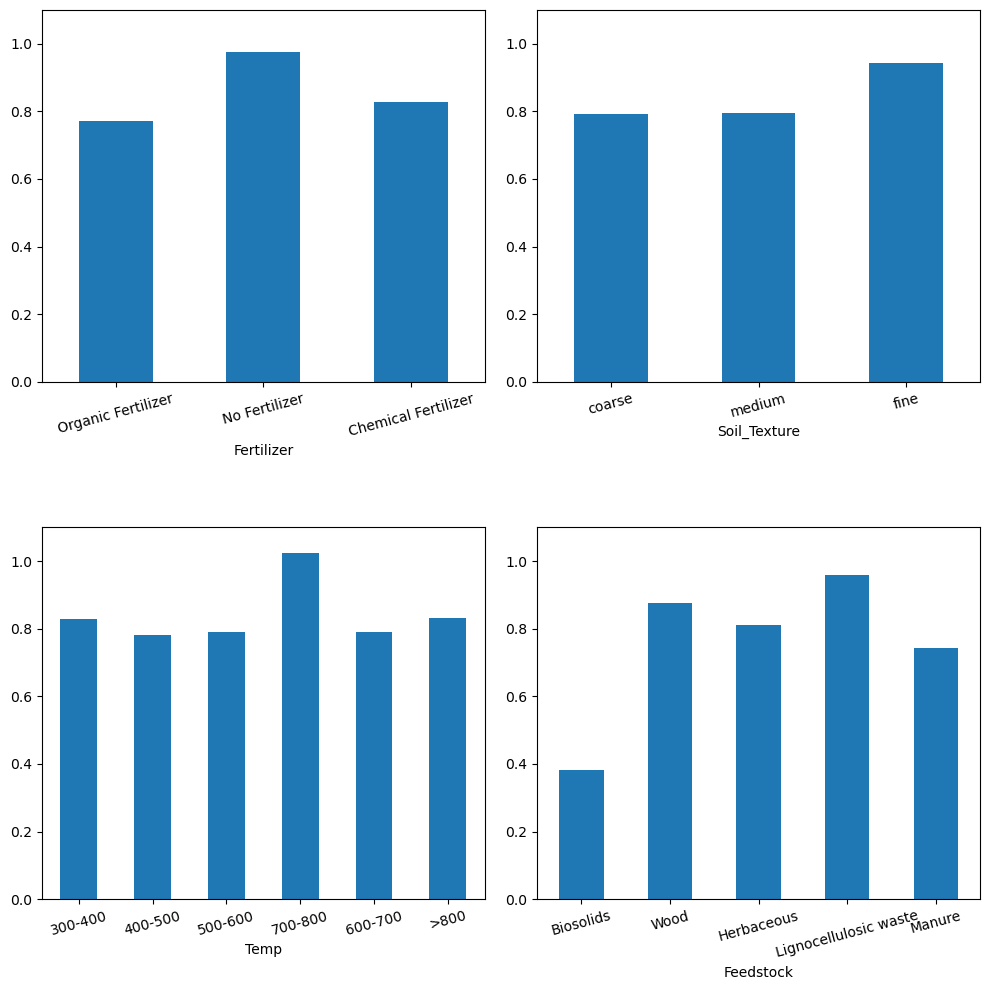

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for idx, feature in enumerate(cat_features[1:]):
    idx_x, idx_y = idx // 2, idx % 2
    ax = axes[idx_x, idx_y]
    (groupby_count_mean([feature]).reindex(index=eval("f_"+feature))['RR_mean'].plot.bar(ax=ax))
    _ = ax.set_ylim(0., 1.1)
    ax.tick_params(axis='x', labelrotation=15)


plt.tight_layout(h_pad=5)
plt.show()
                                          

## 수치형 특성 구간화

모든 수치형 특성에 대해 구간화를 적용하여 범주형 특성으로 변환한다.

**수치형 특성 확인**

In [40]:
num_features = core_field.select_dtypes(include=['f8']).columns
num_features

Index(['N_input', 'Cond_pH', 'Bulk_density', 'Moisture', 'Bio_pH', 'C', 'C/N',
       'Application_Rate', 'RR'],
      dtype='object')

**수치형 특성 분포**

In [41]:
core_field.describe()

N_input     Cond_pH  Bulk_density    Moisture      Bio_pH  \
count  396.000000  364.000000    207.000000  162.000000  375.000000   
mean   226.975505    6.329396      1.192174    0.484314    9.329920   
std    187.985088    1.200879      0.170706    0.210301    1.000185   
min      0.000000    3.870000      0.590000    0.169000    5.590000   
25%     90.000000    5.400000      1.130000    0.288000    9.000000   
50%    200.000000    6.200000      1.200000    0.504000    9.400000   
75%    300.000000    6.832500      1.310000    0.665000   10.000000   
max    890.000000    9.100000      1.530000    0.984500   10.900000   

                C         C/N  Application_Rate          RR  
count  371.000000  359.000000        402.000000  402.000000  
mean     0.527461  102.220195         18.709824    0.827049  
std      0.139111   75.783862         15.262156    0.525317  
min      0.188700    9.300000          0.010000   -2.000000  
25%      0.463200   49.400000          9.000000    0.617183  
50%      0.480000   78.900000         15.000000    0.787523  
75%      0.623300  117.100000         25.000000    0.956570  
max      0.950000  399.500000        128.000000    7.290323

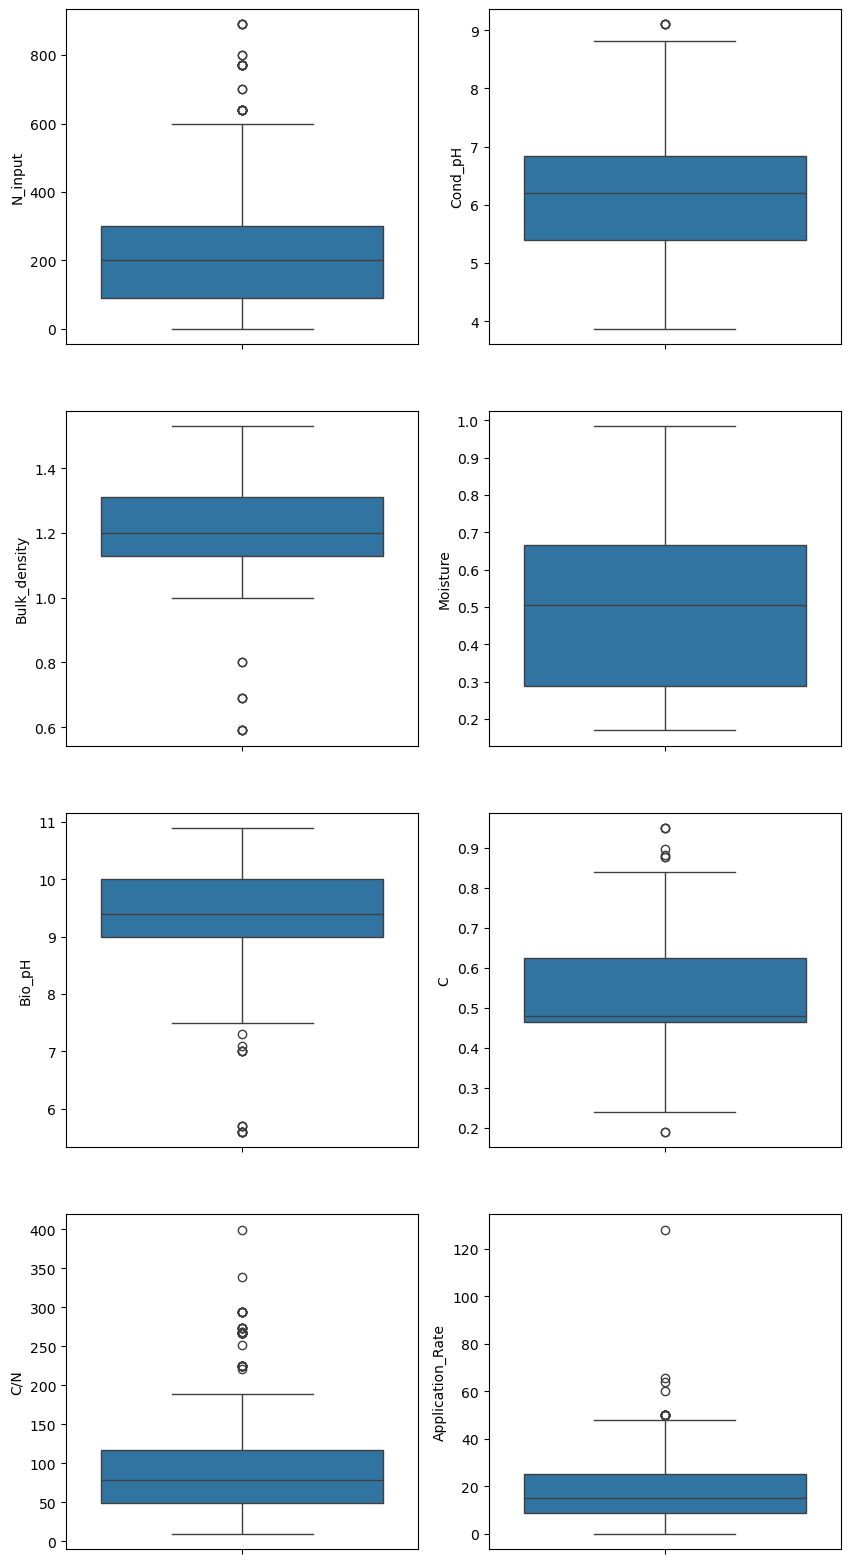

In [42]:
fig, axes = plt.subplots(4, 2, figsize=(10, 20))

for idx, feature in enumerate(num_features[:-1]):
    id_x, id_y = divmod(idx, 2)
    
    _ = sns.boxplot(core_field[feature], ax=axes[id_x, id_y])
    
plt.show()

In [43]:
core_field.describe()

N_input     Cond_pH  Bulk_density    Moisture      Bio_pH  \
count  396.000000  364.000000    207.000000  162.000000  375.000000   
mean   226.975505    6.329396      1.192174    0.484314    9.329920   
std    187.985088    1.200879      0.170706    0.210301    1.000185   
min      0.000000    3.870000      0.590000    0.169000    5.590000   
25%     90.000000    5.400000      1.130000    0.288000    9.000000   
50%    200.000000    6.200000      1.200000    0.504000    9.400000   
75%    300.000000    6.832500      1.310000    0.665000   10.000000   
max    890.000000    9.100000      1.530000    0.984500   10.900000   

                C         C/N  Application_Rate          RR  
count  371.000000  359.000000        402.000000  402.000000  
mean     0.527461  102.220195         18.709824    0.827049  
std      0.139111   75.783862         15.262156    0.525317  
min      0.188700    9.300000          0.010000   -2.000000  
25%      0.463200   49.400000          9.000000    0.617183  
50%      0.480000   78.900000         15.000000    0.787523  
75%      0.623300  117.100000         25.000000    0.956570  
max      0.950000  399.500000        128.000000    7.290323

**지정된 퍼센트 구간으로 구간화하는 함수**

In [44]:
def featureCut(feature, df=core_field, percentiles = None, right=False, retbins=False):
    '''
    percentiles: 퍼센트로 구성된 리스트 형식의 값. describe 메서드에 전달됨. 
                 None은 사분범위를 가리킴.
    '''
    if not percentiles:
        p_length = 5
    else:
        p_length = len(percentiles)+2

    bins = df[feature].describe(percentiles=percentiles).to_list()[-p_length:]
    bins = list(set(bins)) # 중복삭제
    bins.sort()
    bins[-1] += 0.1

    if not percentiles:
        labels = [f"q{idx}" for idx in range(1, 5)]
    else:
        labels = range(len(bins)-1)

    return pd.cut(df[feature], bins=bins, labels=labels, right=right, retbins=retbins)

**예제: `N_input` 특성값을 4분위수를 이용하여 구간화 진행**

In [45]:
featureCut('N_input')

0      q2
1      q2
2      q3
3      q3
4      q1
       ..
397    q1
398    q3
399    q3
400    q3
401    q3
Name: N_input, Length: 402, dtype: category
Categories (4, object): ['q1' < 'q2' < 'q3' < 'q4']

결측치는 그대로 유지된다.

In [46]:
field['N_input'].isna().sum()

6

In [47]:
featureCut('N_input').isna().sum()

6

### 수치형 특성 구간별 평균값

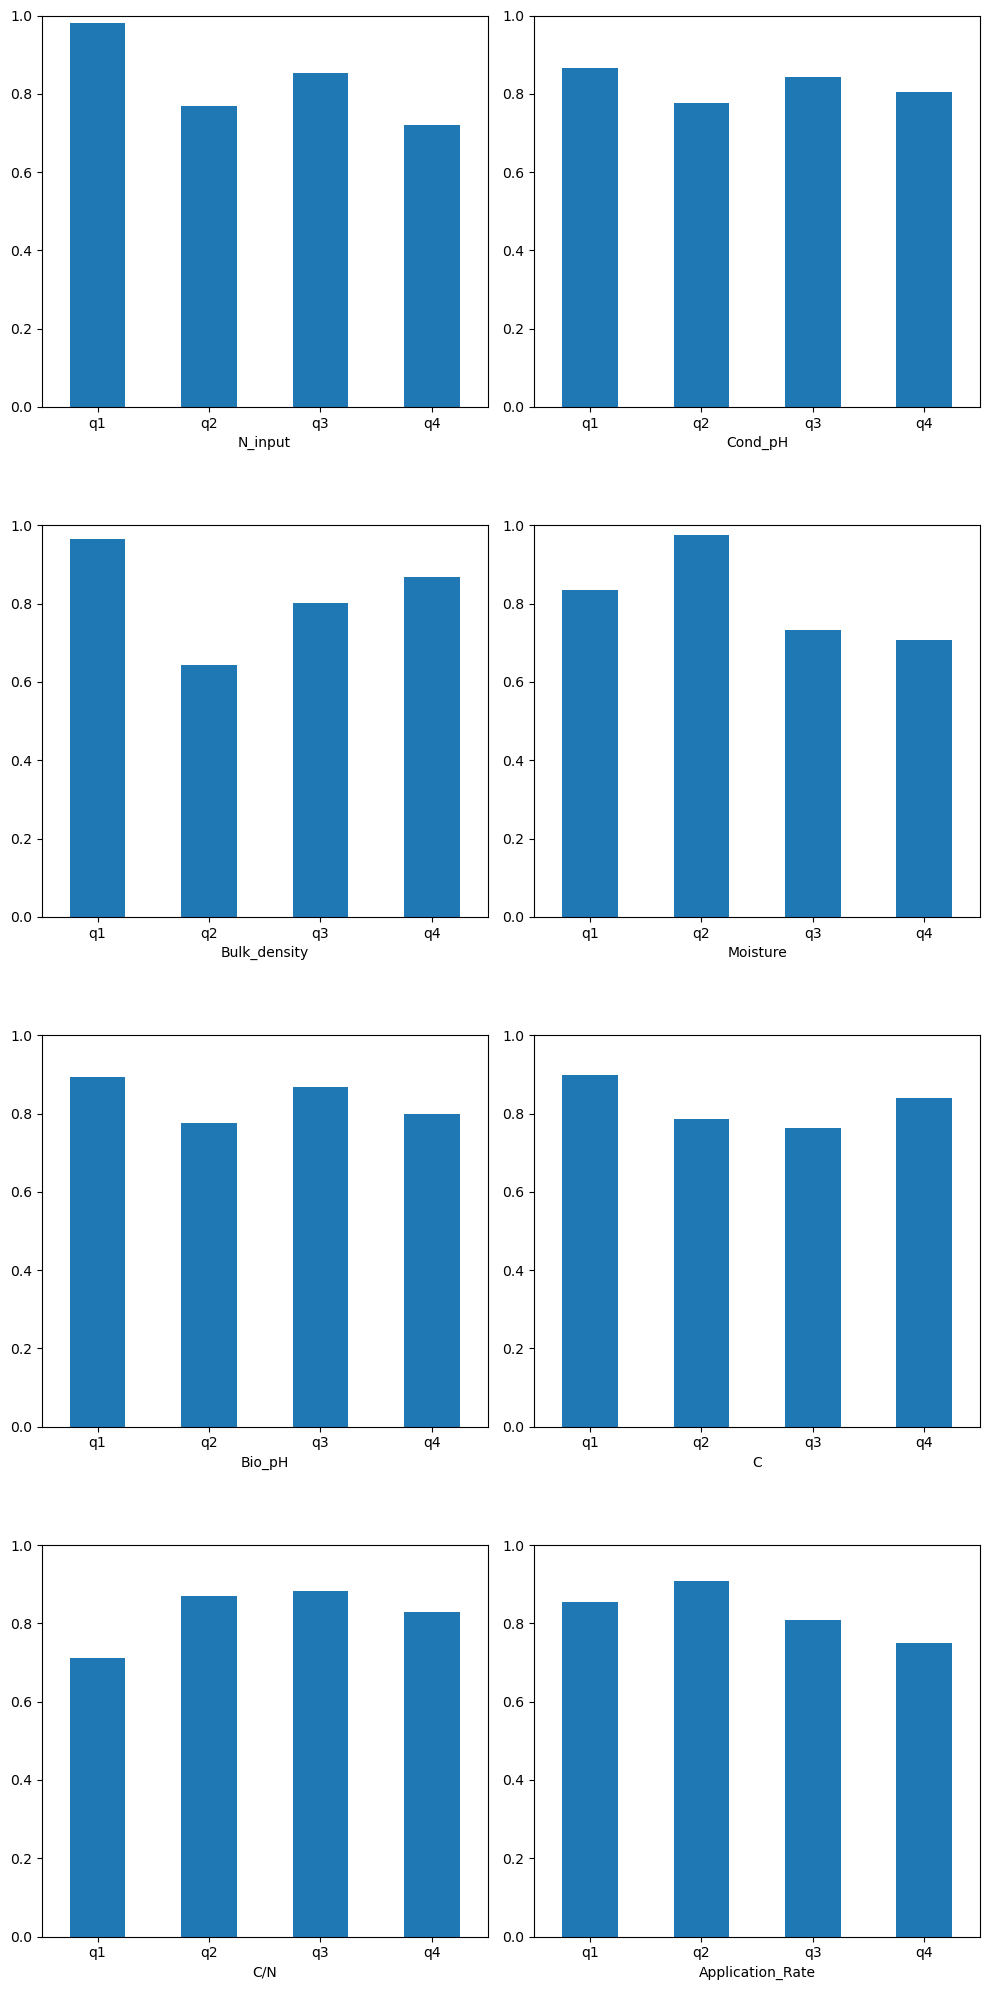

In [48]:
fig, axes = plt.subplots(4, 2, figsize=(10, 20))

for idx, feature in enumerate(num_features[:-1]):
    idx_x, idx_y = idx // 2, idx % 2
    ax = axes[idx_x, idx_y]

    groupby_count_mean([], by=[featureCut(feature)])['RR_mean'].plot.bar(ax=ax)
    _ = ax.set_ylim(0., 1.)
    ax.tick_params(axis='x', labelrotation=0)

plt.tight_layout(h_pad=5)
plt.show()
                                          

### 수치형 특성 구간화

In [49]:
core_field_q = field.copy()

for column in num_features:
    if column not in ['RR']:
        core_field_q[column] = featureCut(column)

In [50]:
core_field_q

Region           Fertilizer N_input Soil_Texture Cond_pH Bulk_density  \
0      Asia  Chemical Fertilizer      q2       coarse      q4          NaN   
1      Asia  Chemical Fertilizer      q2       coarse      q4          NaN   
2      Asia  Chemical Fertilizer      q3       coarse      q2          NaN   
3      Asia  Chemical Fertilizer      q3       coarse      q2          NaN   
4    Europe        No Fertilizer      q1       coarse      q3          NaN   
..      ...                  ...     ...          ...     ...          ...   
397    Asia        No Fertilizer      q1       coarse      q1          NaN   
398    Asia  Chemical Fertilizer      q3       medium      q1           q2   
399    Asia  Chemical Fertilizer      q3       medium      q1           q2   
400    Asia  Chemical Fertilizer      q3       medium      q1           q2   
401    Asia  Chemical Fertilizer      q3       medium      q1           q2   

    Moisture Bio_pH   C  C/N     Temp              Feedstock Application_Rate  \
0        NaN     q4  q2   q2  300-400  Lignocellulosic waste               q1   
1        NaN     q4  q2   q2  300-400  Lignocellulosic waste               q1   
2        NaN     q4  q2   q2  300-400  Lignocellulosic waste               q1   
3        NaN     q4  q2   q2  300-400  Lignocellulosic waste               q1   
4        NaN     q2  q4   q3     >800                   Wood               q2   
..       ...    ...  ..  ...      ...                    ...              ...   
397      NaN     q1  q1   q1  400-500                   Wood               q1   
398      NaN     q2  q4  NaN  500-600             Herbaceous               q1   
399      NaN     q2  q4  NaN  500-600             Herbaceous               q3   
400      NaN     q2  q4  NaN  500-600             Herbaceous               q1   
401      NaN     q2  q4  NaN  500-600             Herbaceous               q3   

           RR  
0    1.853659  
1    1.142857  
2    1.636364  
3    0.727273  
4    1.561960  
..        ...  
397  0.906902  
398  0.700820  
399  0.676230  
400  0.804688  
401  0.710938  

[402 rows x 14 columns]

## 특성 조합

- 예제: 'Fertilizer'`와 `'Feedstock'`

In [51]:
groupby_count_mean(['Fertilizer', 'Feedstock'], df=core_field_q)

RR_count   RR_mean
Fertilizer          Feedstock                                
Chemical Fertilizer Biosolids                    13  0.382772
                    Herbaceous                  192  0.796833
                    Lignocellulosic waste        46  1.021572
                    Manure                       13  0.807020
                    Wood                         33  0.970984
No Fertilizer       Biosolids                     0       NaN
                    Herbaceous                   12  0.986856
                    Lignocellulosic waste         2  1.034404
                    Manure                        2  0.949614
                    Wood                         10  0.957229
Organic Fertilizer  Biosolids                     0       NaN
                    Herbaceous                   11  0.857380
                    Lignocellulosic waste        19  0.798792
                    Manure                        2  0.113633
                    Wood                         35  0.767085

**막대 그래프 활용**

In [52]:
input_features = ['Fertilizer', 'Feedstock']
groupby_mean(input_features, df=core_field_q)['RR'].unstack()

Feedstock            Biosolids  Herbaceous  Lignocellulosic waste    Manure  \
Fertilizer                                                                    
Chemical Fertilizer   0.382772    0.796833               1.021572  0.807020   
No Fertilizer              NaN    0.986856               1.034404  0.949614   
Organic Fertilizer         NaN    0.857380               0.798792  0.113633   

Feedstock                Wood  
Fertilizer                     
Chemical Fertilizer  0.970984  
No Fertilizer        0.957229  
Organic Fertilizer   0.767085

In [53]:
def groupby_bar(feature1, feature2, df, ax):
    input_features = [feature1, feature2]

    gMean = (groupby_mean(input_features, df=df)['RR']).unstack().fillna(0)
    gCount = groupby_count(input_features, df=df)['RR'].unstack().fillna(0)
    cColumns = gCount.columns

    gMean.plot.bar(ylabel="RR", ax=ax, width=0.8, rot=0)

    # 막대 위에 빈도 표기
    for bars, col in zip(ax.containers, cColumns):
        ax.bar_label(bars, labels=['' if val == 0 else f'{int(val)}' for val in gCount[col]])

    plt.tight_layout(h_pad=3)
#     plt.show()

- 활용 예제

**Region 기준**

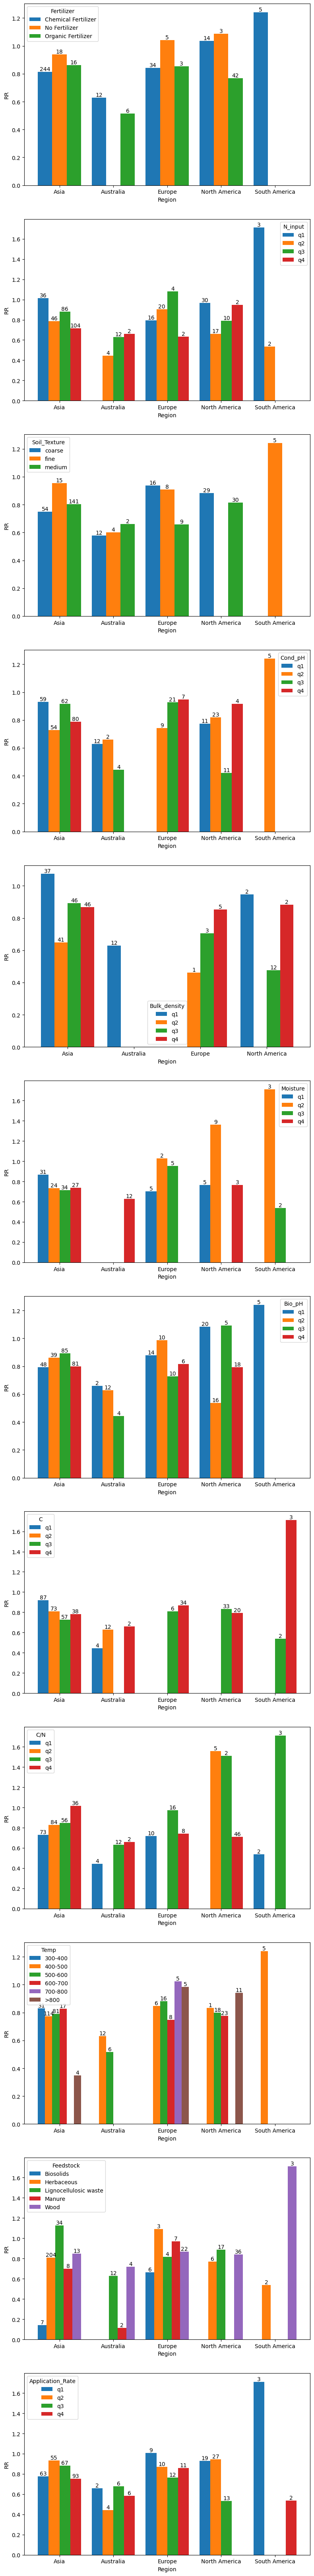

In [54]:
fig, axes = plt.subplots(12, 1, figsize=(8, 65))

feature1 = 'Region'

idx = 0
for feature2 in core_field_q.columns:
    if feature2 in [feature1, 'RR']:
        continue
    groupby_bar(feature1, feature2, core_field_q, axes[idx])
    idx += 1


**Fertilizer 기준**

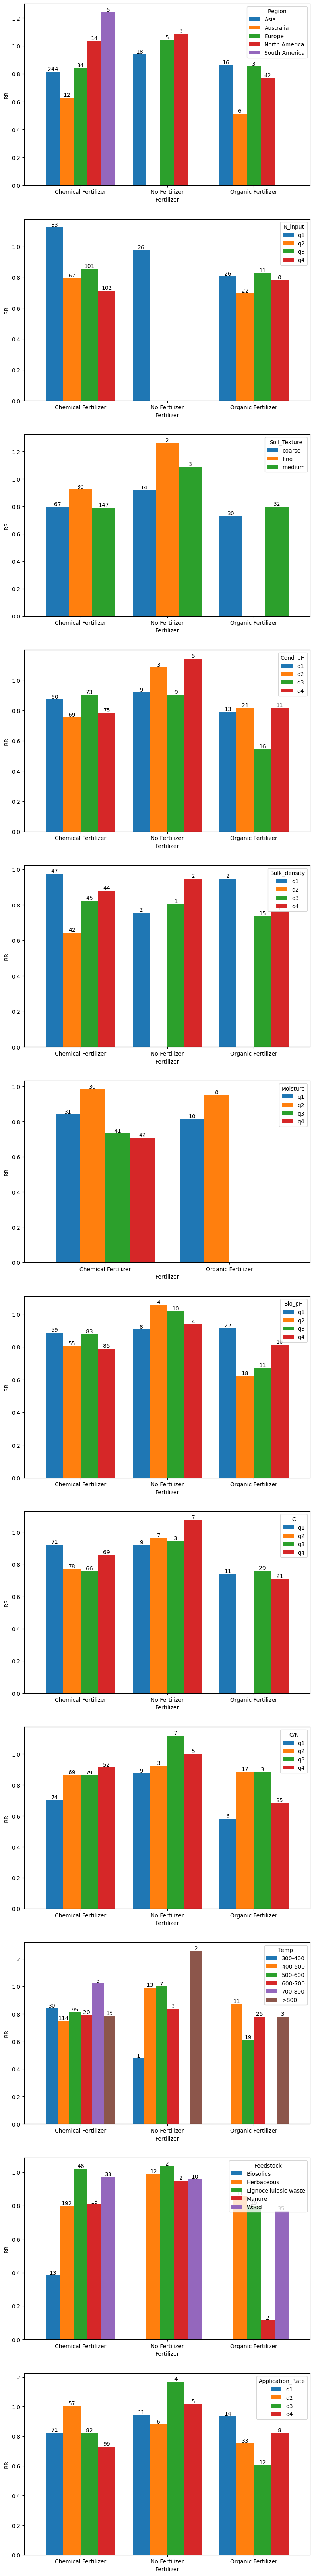

In [55]:
fig, axes = plt.subplots(12, 1, figsize=(8, 65))

feature1 = 'Fertilizer'

idx = 0
for feature2 in core_field_q.columns:
    if feature2 in [feature1, 'RR']:
        continue
    groupby_bar(feature1, feature2, core_field_q, axes[idx])
    idx += 1


**N_input 기준**

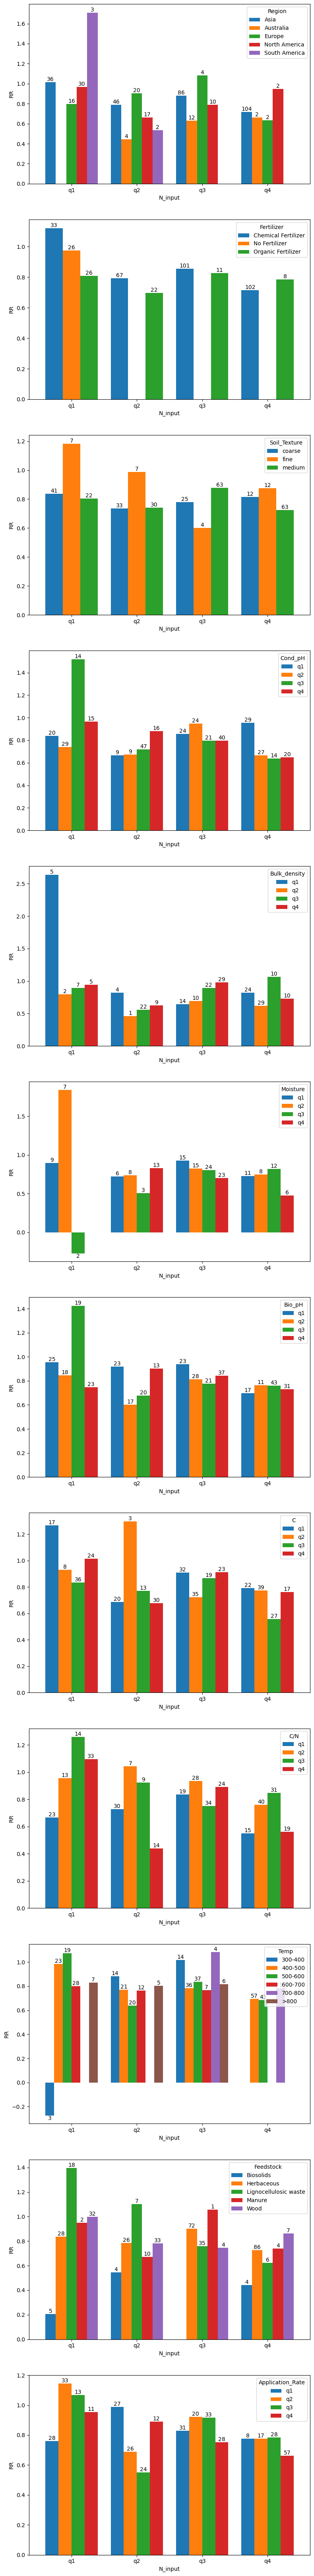

In [56]:
fig, axes = plt.subplots(12, 1, figsize=(8, 65))

feature1 = 'N_input'

idx = 0
for feature2 in core_field_q.columns:
    if feature2 in [feature1, 'RR']:
        continue
    groupby_bar(feature1, feature2, core_field_q, axes[idx])
    idx += 1


**Soil_Texture 기준**

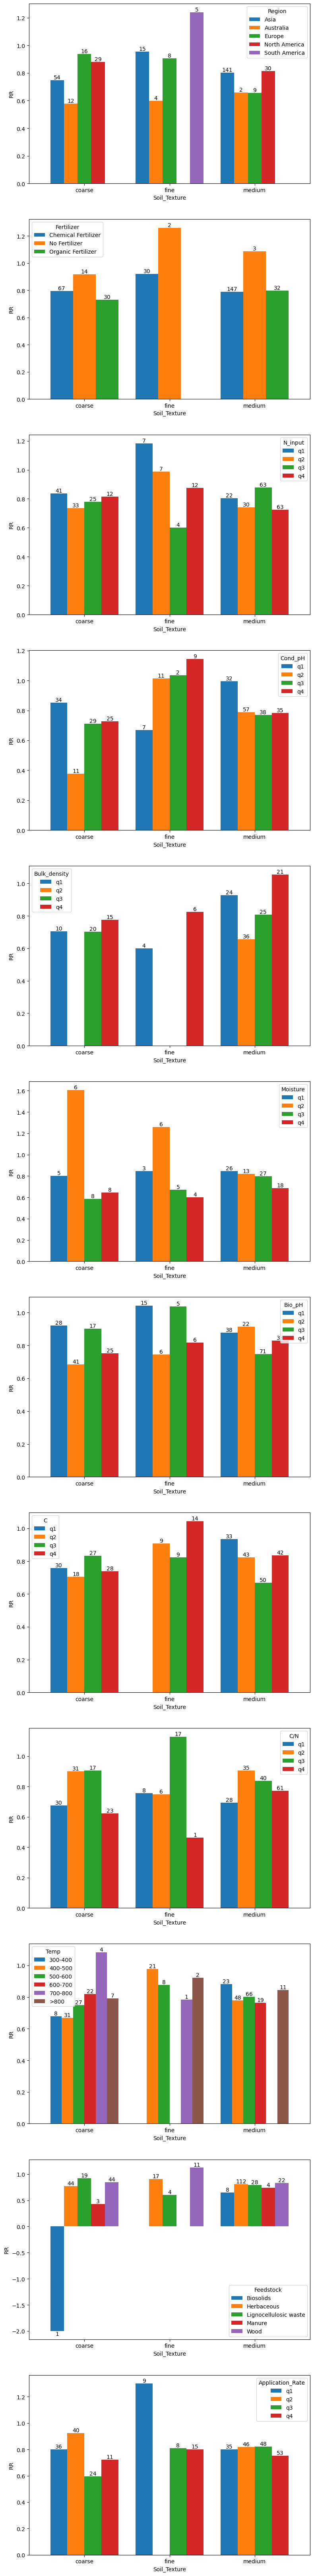

In [57]:
fig, axes = plt.subplots(12, 1, figsize=(8, 65))

feature1 = 'Soil_Texture'

idx = 0
for feature2 in core_field_q.columns:
    if feature2 in [feature1, 'RR']:
        continue
    groupby_bar(feature1, feature2, core_field_q, axes[idx])
    idx += 1


**Cond_pH 기준**

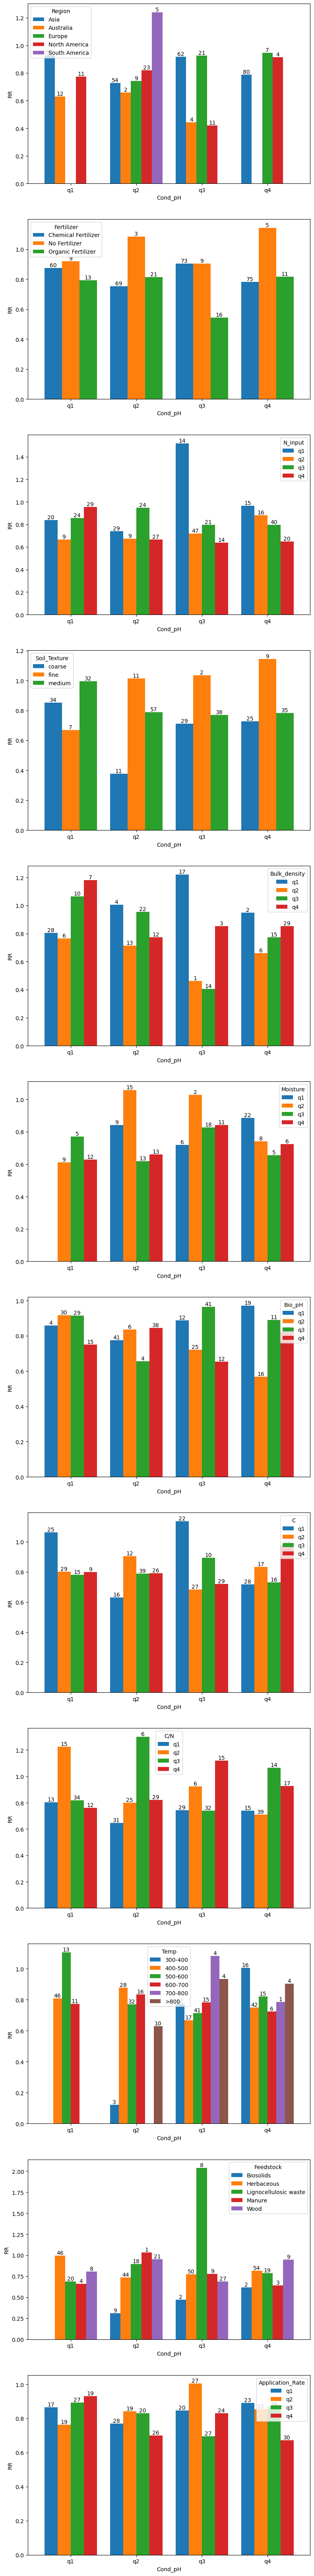

In [58]:
fig, axes = plt.subplots(12, 1, figsize=(8, 65))

feature1 = 'Cond_pH'

idx = 0
for feature2 in core_field_q.columns:
    if feature2 in [feature1, 'RR']:
        continue
    groupby_bar(feature1, feature2, core_field_q, axes[idx])
    idx += 1


**Bulk_density 기준**

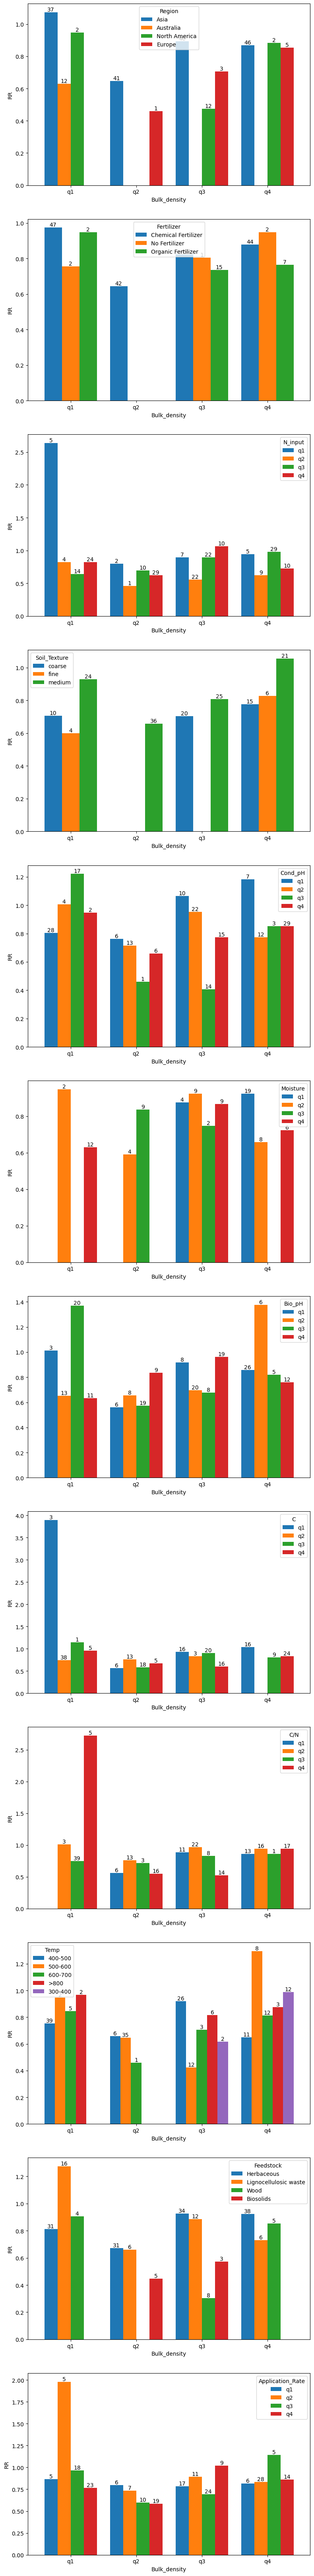

In [59]:
fig, axes = plt.subplots(12, 1, figsize=(8, 65))

feature1 = 'Bulk_density'

idx = 0
for feature2 in core_field_q.columns:
    if feature2 in [feature1, 'RR']:
        continue
    groupby_bar(feature1, feature2, core_field_q, axes[idx])
    idx += 1


**Moisture 기준**

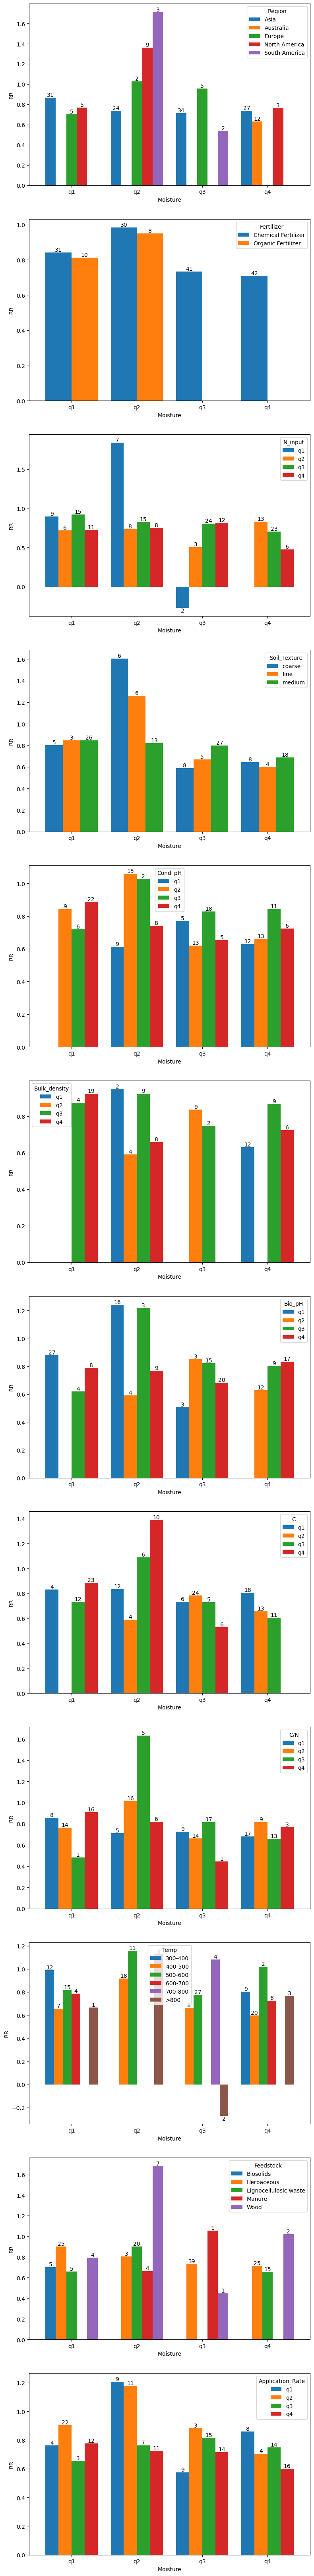

In [60]:
fig, axes = plt.subplots(12, 1, figsize=(8, 65))

feature1 = 'Moisture'

idx = 0
for feature2 in core_field_q.columns:
    if feature2 in [feature1, 'RR']:
        continue
    groupby_bar(feature1, feature2, core_field_q, axes[idx])
    idx += 1


**Bio_pH 기준**

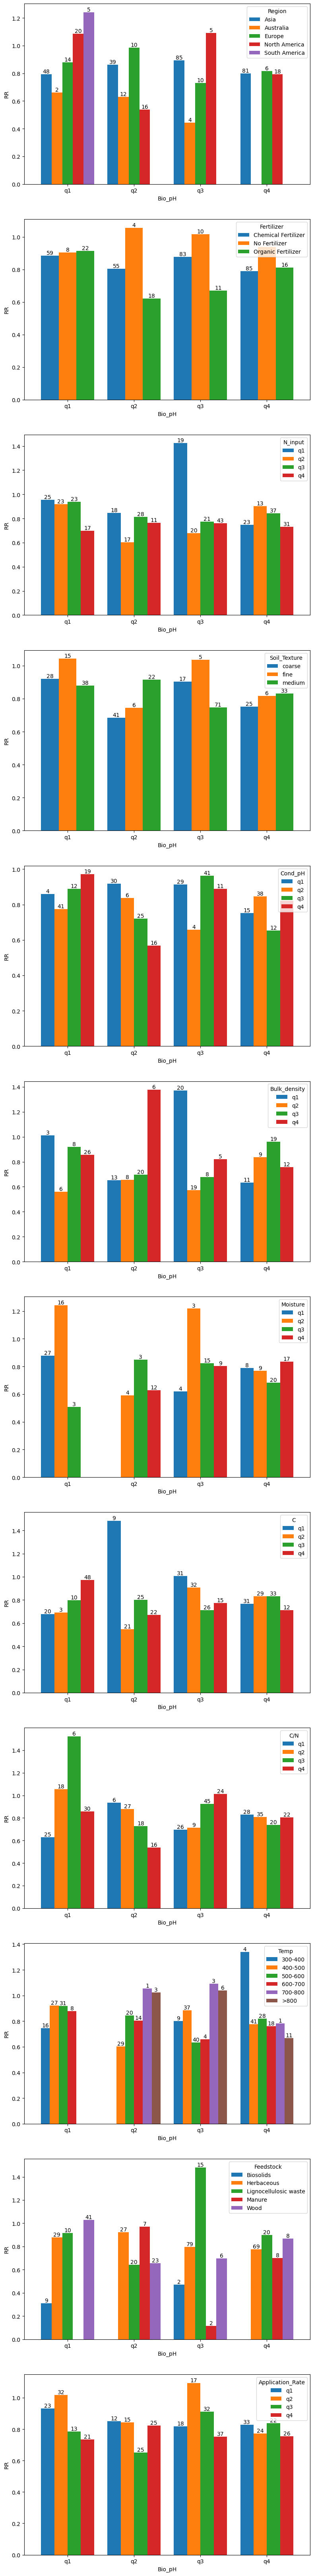

In [61]:
fig, axes = plt.subplots(12, 1, figsize=(8, 65))

feature1 = 'Bio_pH'

idx = 0
for feature2 in core_field_q.columns:
    if feature2 in [feature1, 'RR']:
        continue
    groupby_bar(feature1, feature2, core_field_q, axes[idx])
    idx += 1


**C 기준**

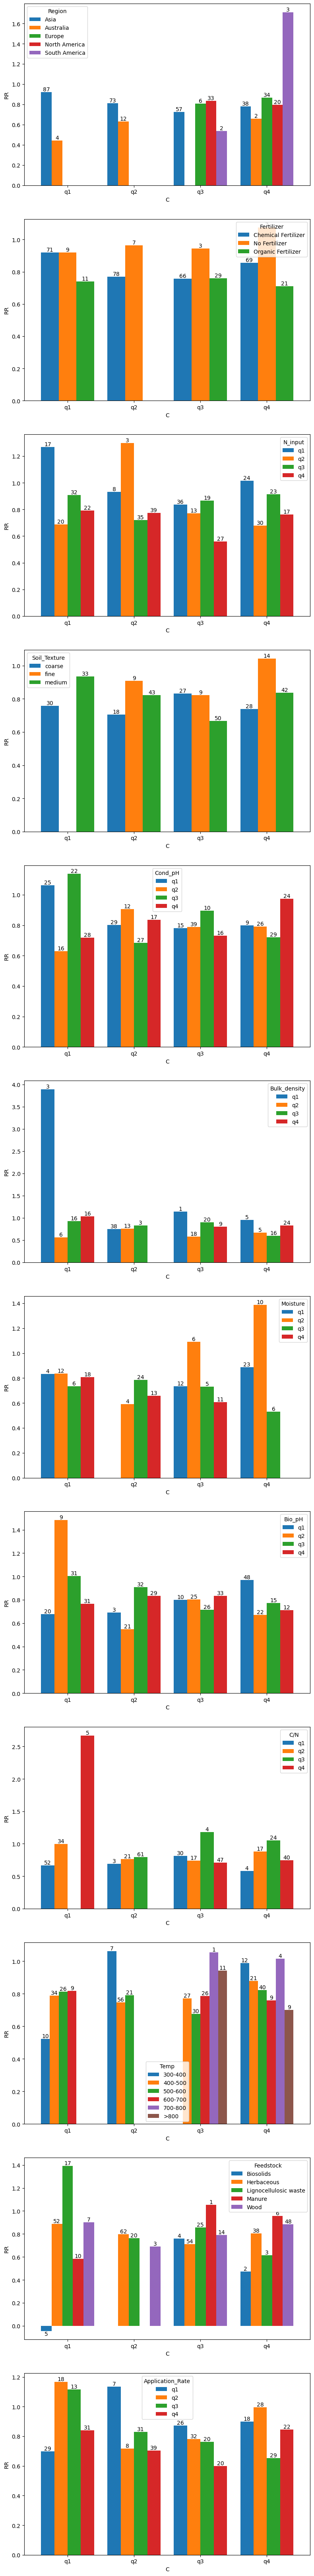

In [62]:
fig, axes = plt.subplots(12, 1, figsize=(8, 65))

feature1 = 'C'

idx = 0
for feature2 in core_field_q.columns:
    if feature2 in [feature1, 'RR']:
        continue
    groupby_bar(feature1, feature2, core_field_q, axes[idx])
    idx += 1


**C/N 기준**

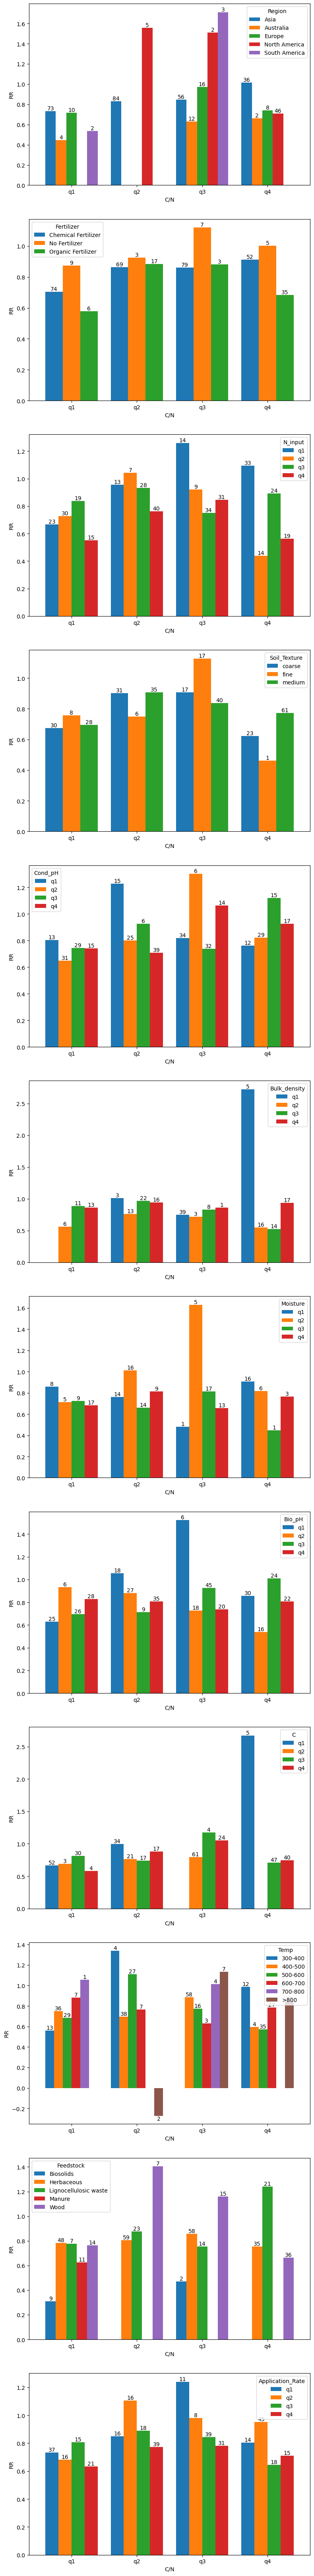

In [63]:
fig, axes = plt.subplots(12, 1, figsize=(8, 65))

feature1 = 'C/N'

idx = 0
for feature2 in core_field_q.columns:
    if feature2 in [feature1, 'RR']:
        continue
    groupby_bar(feature1, feature2, core_field_q, axes[idx])
    idx += 1


**Temp 기준**

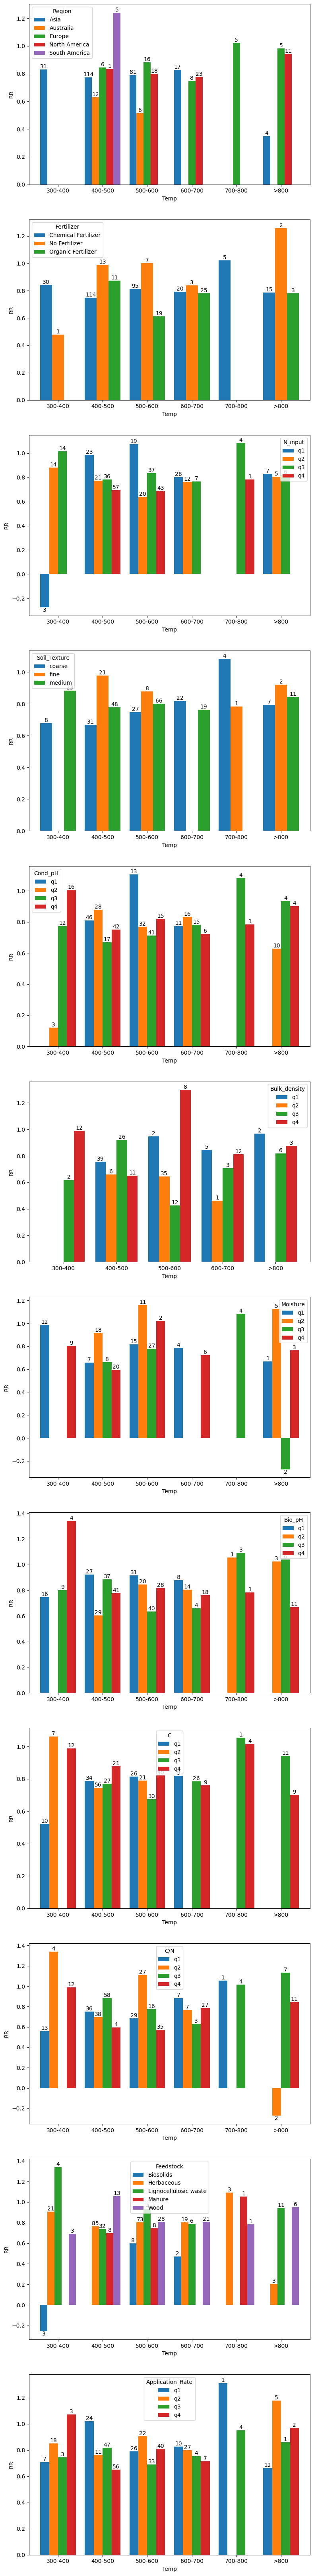

In [64]:
fig, axes = plt.subplots(12, 1, figsize=(8, 65))

feature1 = 'Temp'

idx = 0
for feature2 in core_field_q.columns:
    if feature2 in [feature1, 'RR']:
        continue
    groupby_bar(feature1, feature2, core_field_q, axes[idx])
    idx += 1


**Feedstock 기준**

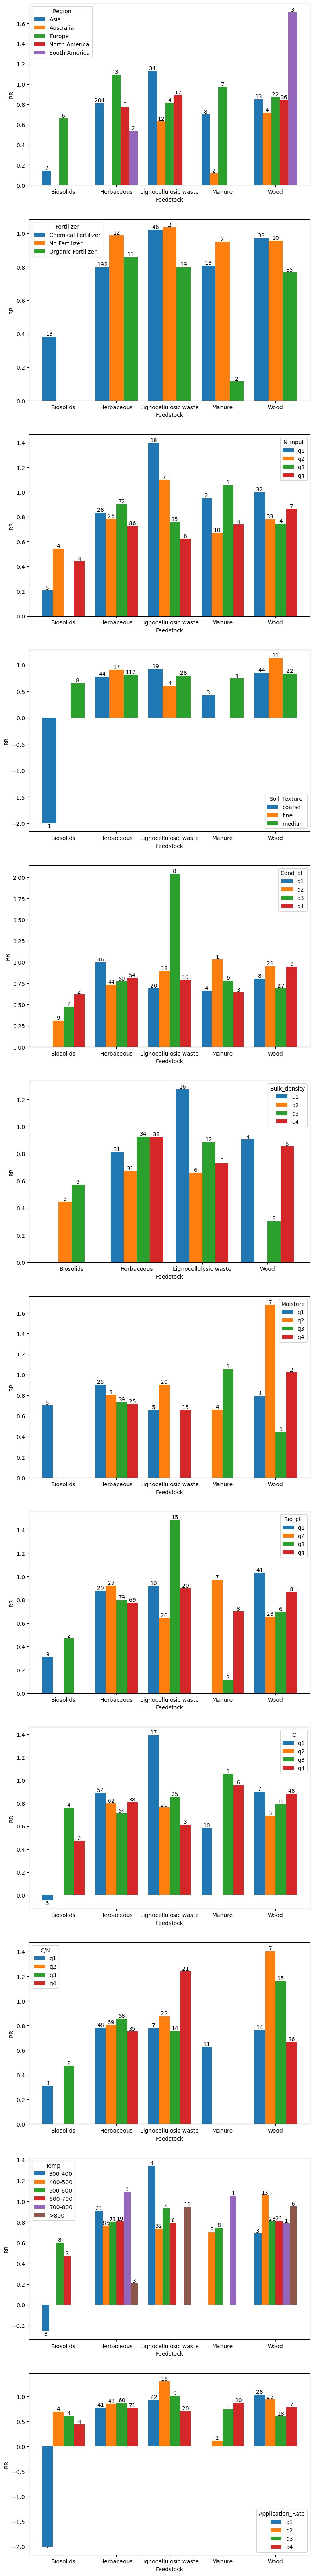

In [65]:
fig, axes = plt.subplots(12, 1, figsize=(8, 65))

feature1 = 'Feedstock'

idx = 0
for feature2 in core_field_q.columns:
    if feature2 in [feature1, 'RR']:
        continue
    groupby_bar(feature1, feature2, core_field_q, axes[idx])
    idx += 1


**Application_Rate 기준**

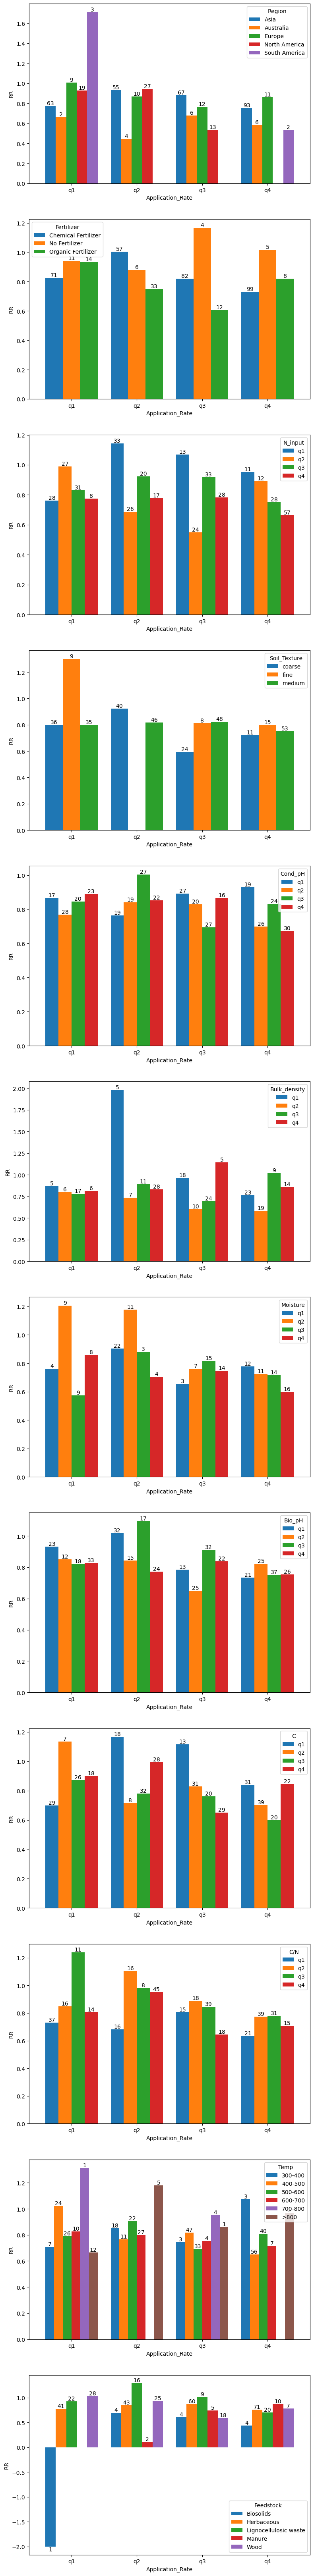

In [66]:
fig, axes = plt.subplots(12, 1, figsize=(8, 65))

feature1 = 'Application_Rate'

idx = 0
for feature2 in core_field_q.columns:
    if feature2 in [feature1, 'RR']:
        continue
    groupby_bar(feature1, feature2, core_field_q, axes[idx])
    idx += 1
